In [31]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style ="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics

In [33]:
# Load the dataset
data = pd.read_csv('phishing.txt', header=None)
data.shape


(11055, 31)

In [34]:
# Assign column names
data.columns = ['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//', 
                'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon', 
                'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL', 
                'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL', 
                'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick', 
                'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 
                'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex', 
                'LinksPointingToPage', 'StatsReport', 'class']

# Show the first five rows
data.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [35]:
#Build a phishing website classifier using Logistic Regression with “C” parameter = 100. 
# Split into features and target
X = data.drop('class', axis=1)
y = data['class']

# Split into training and test sets. Use 70% of data as training data and the remaining 30% as test data. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Logistic Regression classifier with C=100
classifier = LogisticRegression(C=100)

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy score: {accuracy:.2f}')


Accuracy score: 0.92


In [36]:

# Calculate the number of misclassified samples
misclassified_samples = (y_test != y_pred).sum()

print(f'Number of misclassified samples: {misclassified_samples}')


Number of misclassified samples: 259


C:\Users\bhavna\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


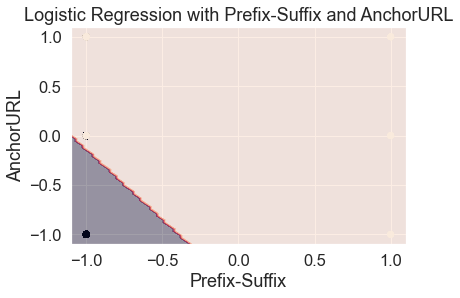

In [40]:
# Select only the relevant columns
X = data[['PrefixSuffix-', 'AnchorURL']]
y = data['class']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Logistic Regression classifier with C=100
clf = LogisticRegression(C=100)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)


# Define the decision boundary function
def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X.iloc[:, 0].min() - 0.1, X.iloc[:, 0].max() + 0.1
    x2_min, x2_max = X.iloc[:, 1].min() - 0.1, X.iloc[:, 1].max() + 0.1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
    Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, alpha=0.8)
    plt.xlabel('Prefix-Suffix')
    plt.ylabel('AnchorURL')
    plt.title('Logistic Regression with Prefix-Suffix and AnchorURL')
    plt.show()

# Plot the decision boundary and test data for PrefixSuffix- (index 5) and AnchorURL (index 13)
plot_decision_boundary(clf, X_test.iloc[:, [0, 1]], y_test)
